## Download Dataset

In [1]:
import os 
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

## Load Dataset

In [2]:
import pandas as pd

housing = pd.read_csv(str(HOUSING_PATH) + "\housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Data kita memiliki 9 tipe float64(Numerical) dan 1 tipe object(Categorical). 
Hal lain yang bisa kita lihat yaitu kolom "total_bedrooms" memiliki 20433 non-null, yang artinya kolom tersebut memiliki 207 missing values yang perlu kita selidiki lebih lanjut.

In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


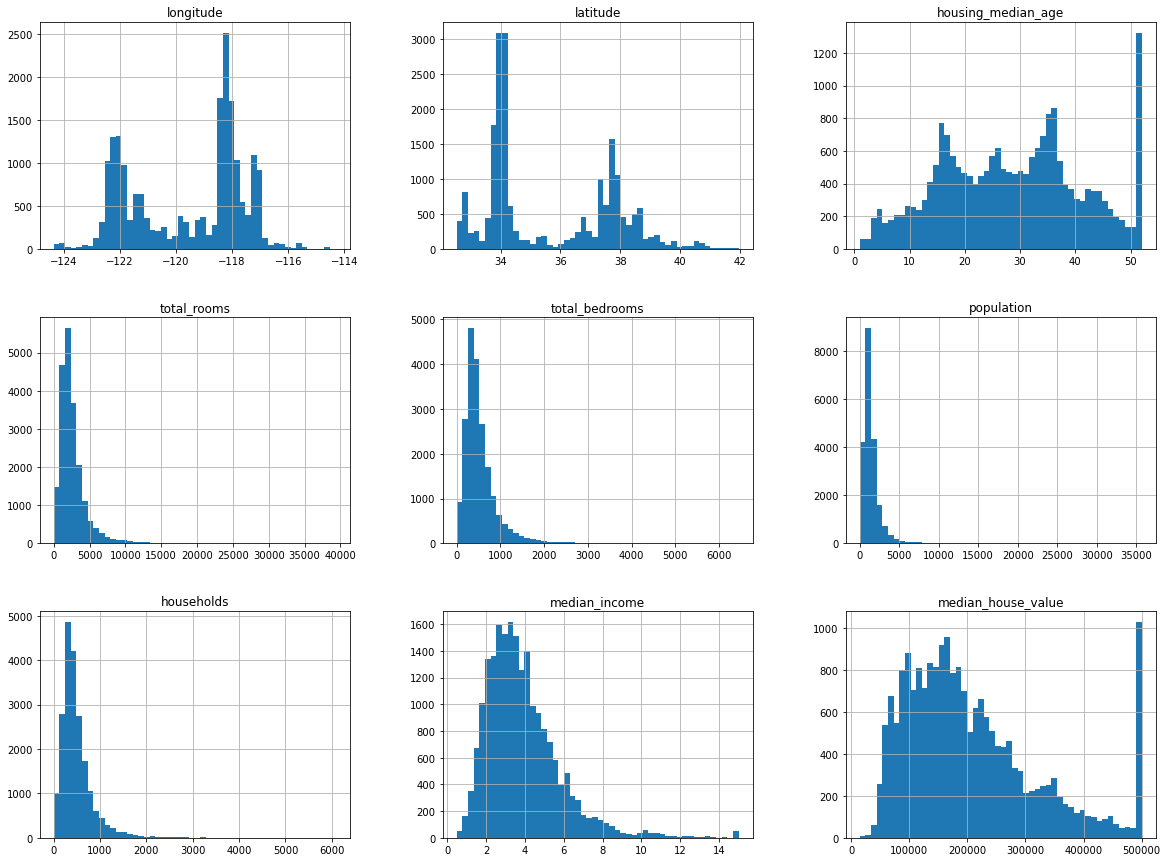

In [6]:
#Plot histogram untuk setiap kolom numerical

%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

Dari histogram tersebut kita bisa melihat beberapa hal, yaitu:

1. Kolom "median_income" sepertinya tidak dalam satuan(USD). Setelah melihat deskripsi kolom tersebut pada penyedia data, ternyata kolom tersebut telah di scalling dan memiliki nilai maksimum 15 untuk "median_income" tinggi dan minimum 0.5 untuk "median_income" rendah. Angka ini merepresentasikan dalam puluhan ribu(USD) (contohnya 3 = 30,000 USD)
2. Kolom "median_age" dan "median_house_value" juga telah discaling. Terlihat dari histogram diatas yang tidak bisa melebihi angka yang telah ditentukan. Hal ini merupakan sebuah masalah karena nantinya Algoritma Machine Learning yang kita buat akan mempelajari bahwa harga rumah tidak bisa melebihi angka tersebut.    
3. Data memiliki scaling yang berbeda tiap tiap kolom. Kita perlu melihat lebih lanjut nanti.
4. Beberapa histogram memperlihatkan ekor yang panjang (right skewed) mengindikasikan terdapat outliers pada kolom tersebut.

## Create Test Set

Walaupun kita hanya melihat dataset sekilas, hal selanjutya yang perlu kita lakukan adalah memisahkan train set dan test set. Hal ini dilakukan dikarenakan, jika kita melihat test set mungkin otak kita dapat melihat pattern yang spesifik dan memilih model yang overfitting terhadap pattern yang kita temukan. Akibatnya, ketika mengestimasi error menggunakan test set kita akan membuat Algoritma yang optimistik dan tidak bekerja sesuai ekspetasi. Hal ini disebut *data snooping bias*.

### Random Sampling

In [7]:
#Membuat test set dengan jumlah 20% dari total data dengan random sampling

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f'Jumlah train set: {len(train_set)}')
print(f'Jumlah test set: {len(test_set)}')

Jumlah train set: 16512
Jumlah test set: 4128


### Stratified Sampling

Setelah mendapatkan informasi bahwa kolom "median_income" sangat penting untuk memprediksi target variabel, maka kita perlu membagi test set agar representatif dengan fitur tersebut untuk menghindari *sampling bias*.

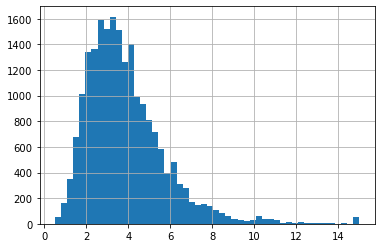

In [8]:
housing['median_income'].hist(bins=50)
plt.show()

Dari histogram diatas kita bisa melihat bahwa, kebanyakan data berkumpul di antara 1.5 dan 6, serta beberapa data jauh diatas 6. Dengan mengkategorikan kolom tersebut ke dalam beberapa kategori, diharapkan kita bisa membagi test set agar representatif sesuai histogram diatas.

In [9]:
import numpy as np

housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5,])

<AxesSubplot:>

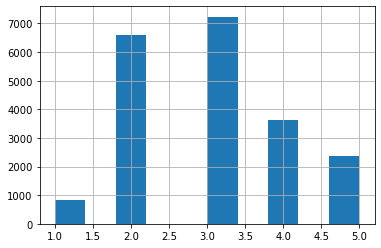

In [10]:
housing['income_cat'].hist()

In [11]:
#Membuat test set dengan jumlah 20% dari total data dengan stratified sampling

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [12]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [13]:
housing['income_cat'].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [14]:
# Drop kolom "income_cat" agar data kembali seperti semula

for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## Exploratory Data Analysis

In [15]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


### Visualizing Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

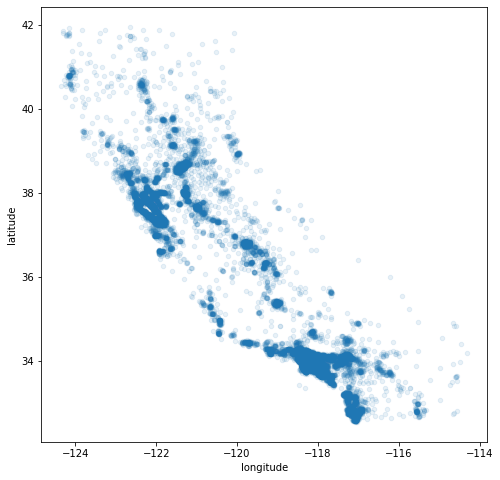

In [16]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, figsize=(8,8))

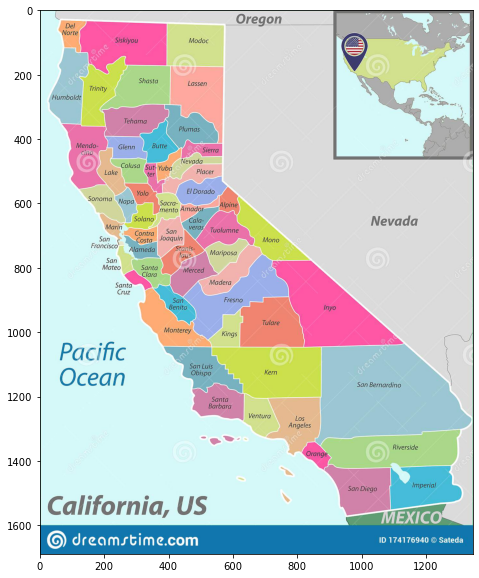

In [17]:
img = plt.imread('image/california.jpg')
plt.figure(figsize=(10,10))
plt.imshow(img)

Dari dua gambar diatas, kita bisa melihat beberapa high-density area, yaitu San Diego, Los Angeles, sekitar San Fransisco dan terdapat garis panjang di area Sacramento sampai Fresno.

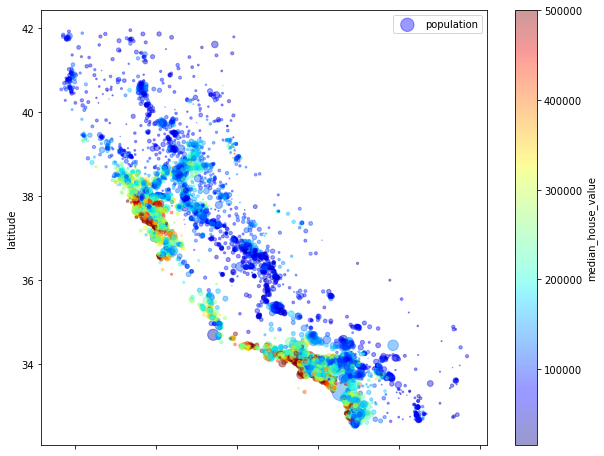

In [18]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population']/100, label='population', figsize=(10,8),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

Dari plot diatas kita bisa melihat bahwa, harga rumah di California berkorelasi dengan lokasi seperti dekat dengan laut dan berpopulasi tinggi. Namun, terdapat pengecualian terhadap bagian utara California, karena harga rumah di dekat laut masih tergolong rendah.

### Spotting Correlation

In [19]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

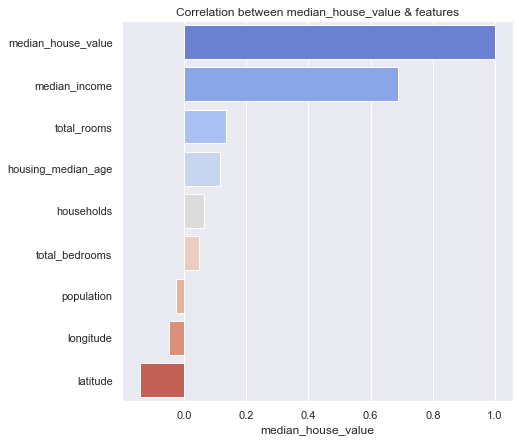

In [20]:
import seaborn as sns

sns.set_theme(style="darkgrid")
plt.figure(figsize=(7,7))
plt.title('Correlation between median_house_value & features')
sns.barplot(x=corr_matrix['median_house_value'].sort_values(ascending=False), 
            y=corr_matrix['median_house_value'].sort_values(ascending=False).index, palette='coolwarm')
plt.show()

Dari correlation plot diatas, "median_income" terlihat menjajikan untuk memprediksi harga rumah di California.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

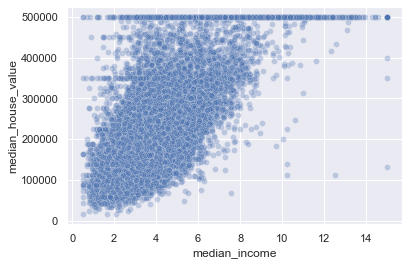

In [21]:
sns.scatterplot(x='median_income', y='median_house_value', data=housing, alpha=0.3)

1. Plot diatas memperlihatkan korelasi yang kuat dan positif, kita bisa melihat trend yang jelas naik. 
2. Tetapi, kita bisa melihat bahwa "median_house_value" memiliki batas 500.000 karena data telah discaling oleh penyedia data.
3. Terdapat garis lurus tipis di area 450.000, 350.000, perlu dilakukan penyelidikan lebih lanjut kenapa hal ini terjadi.

### Feature Extraction

In [22]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


Jika kita lihat data diatas, beberapa kolom tidak efektif untuk memprediksi harga rumah di California. 
1. Jumlah kamar tidak ada artinya jika sendirian, jika kita gabungkan dengan jumlah rumah menjadi jumlah kamar per rumah "rooms_per_household" akan menjadi lebih berguna. 
2. Contoh lain yaitu, menggabungkan jumlah kamar mandi dan jumlah kamar menjadi "bedrooms_per_room".
3. Menggabungkan populasi dengan jumlah rumah menjadi "population_per_household". 

In [23]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


Mari kita lihat korelasi antar fitur dengan target setelah menggabungkan beberapa kolom

In [24]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

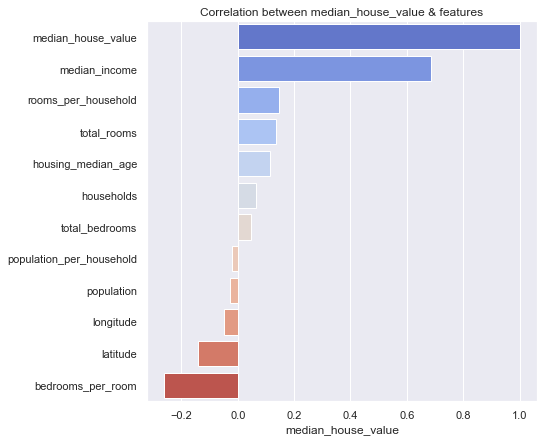

In [25]:
import seaborn as sns

sns.set_theme(style="darkgrid")
plt.figure(figsize=(7,7))
plt.title('Correlation between median_house_value & features')
sns.barplot(x=corr_matrix['median_house_value'].sort_values(ascending=False), 
            y=corr_matrix['median_house_value'].sort_values(ascending=False).index, palette='coolwarm')
plt.show()

Dari 3 fitur yang kita ekstrak, 2 fitur memiliki korelasi yang lumayan tinggi.

## Data Preprocessing

In [26]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Numerical Columns

<AxesSubplot:>

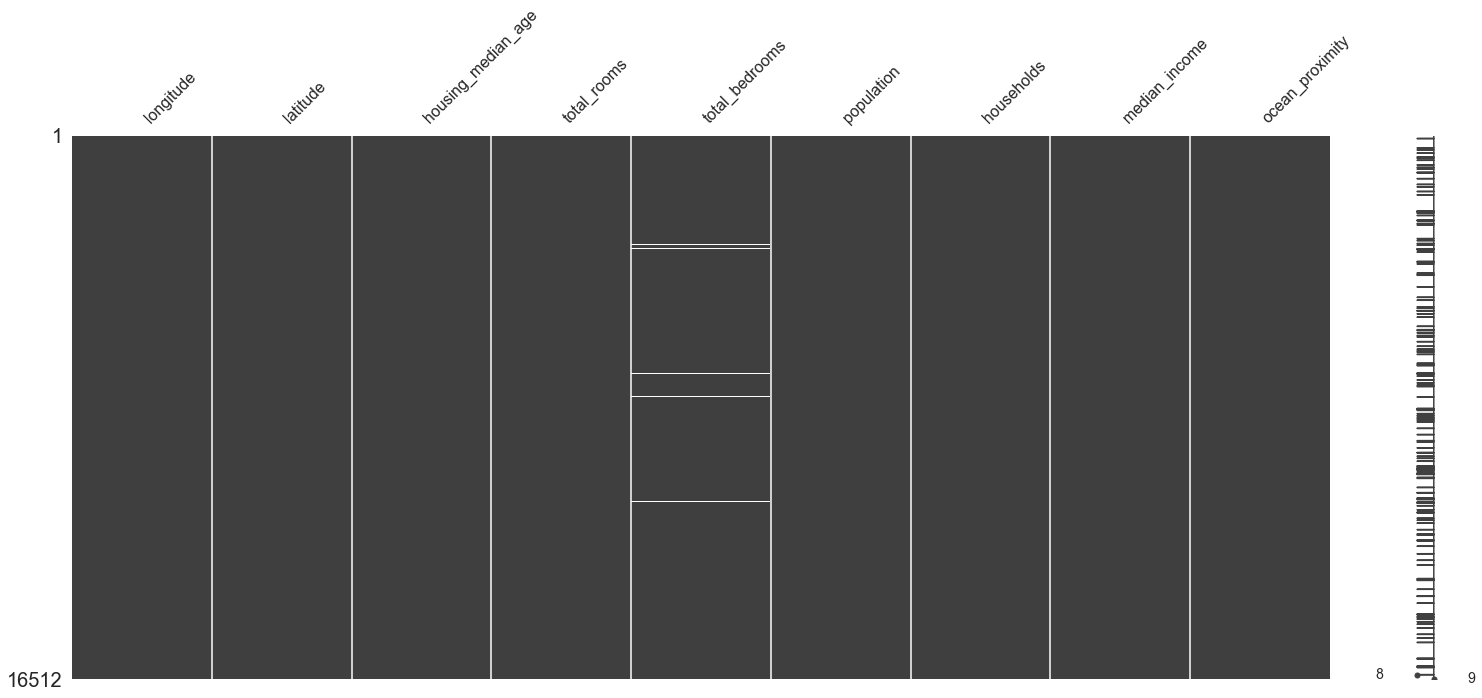

In [27]:
import missingno as msno

msno.matrix(housing)

Terdapat beberapa missing value di kolom "total_bedrooms"

In [28]:
housing['total_bedrooms'].isnull().sum()

158

<AxesSubplot:>

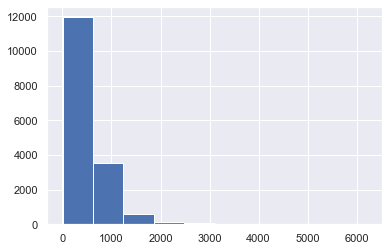

In [29]:
housing['total_bedrooms'].hist()

Kolom "total_bedrooms" menunjukkan right skewed, untuk itu kita akan mengimpute missing values menggunakan median.

In [30]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [31]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [32]:
for x in imputer.statistics_:
    print(x)

-118.51
34.26
29.0
2119.0
433.0
1164.0
408.0
3.54155


In [33]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

### Categorical Column

In [34]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

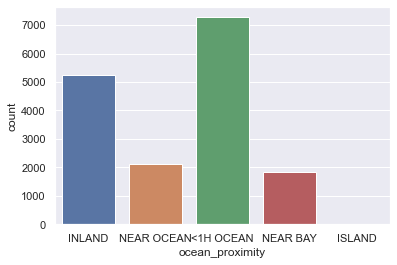

In [35]:
sns.set_theme(style="darkgrid")
sns.countplot(x='ocean_proximity', data=housing)

Untuk mengolah data kategorikal yang tidak berurutan seperti kolom diatas menjadi sebuah fitur yang bisa dipahami oleh Algoritma Machine Learning kita perlu menggunakan One Hot Encoder / Dummy Variable.

In [36]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [37]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [38]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Create Custom Transformers

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [40]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Transfomation Pipelines

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_ader', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [42]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

## Model Training

### 1. Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [44]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(f'Predicton: {lin_reg.predict(some_data_prepared)}')
print(f'Labels: {list(some_labels)}')

Predicton: [ 86272. 304640. 154240. 185984. 244224.]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Prediksi yang dihasilkan oleh model masih jauh dari kata sempurna, bahkan prediksi ke-3 melenceng hampir 50%.

In [45]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'RMSE: {lin_rmse}')

RMSE: 68637.0894294635


Harga rumah di California kebanyakan berkisar di harga 120,000 - 265,000. Dengan RMSE 68,637 artinya kita melenceng 25-50% dari harga sebenarnya.

### 2. Desicion Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [47]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(f'RMSE: {tree_rmse}')

RMSE: 0.0


Decision Tree menghasilkan RMSE 0, hal ini menunjukkan bahwa model ini overfitting.

In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                     scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
tree_rmse_scores = np.sqrt(-scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.9s finished


In [62]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard deviation: {scores.std()}')

display_scores(tree_rmse_scores)

Scores: [68647.58864476 71527.46745076 69247.38456674 72610.04518621
 70537.39331777]
Mean: 70513.97583324653
Standard deviation: 1449.7499745506127


### 3. Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [51]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(f'RMSE: {forest_rmse}')

RMSE: 18757.87049803666


In [52]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                     scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
forest_rmse_scores = np.sqrt(-scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   53.6s finished


In [53]:
display_scores(forest_rmse_scores)

Scores: [50242.36070529 49981.48325207 49948.72381885 51605.72917656
 51428.33923095]
Mean: 50641.32723674521
Standard deviation: 724.3931049288692


In [54]:
#Save model
import joblib

joblib.dump(forest_reg, 'forest_reg.pkl')
joblib.dump(lin_reg, 'lin_reg.pkl')
joblib.dump(tree_reg, 'tree_reg.pkl')

['forest_reg.pkl']

### Hyperparameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
                           verbose=2, return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [58]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [59]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [61]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64107.074847305266 {'max_features': 2, 'n_estimators': 3}
55611.00621896121 {'max_features': 2, 'n_estimators': 10}
52952.97115239486 {'max_features': 2, 'n_estimators': 30}
60888.041256909375 {'max_features': 4, 'n_estimators': 3}
52609.59265352522 {'max_features': 4, 'n_estimators': 10}
50347.46836726167 {'max_features': 4, 'n_estimators': 30}
59624.061451914145 {'max_features': 6, 'n_estimators': 3}
51838.3361829891 {'max_features': 6, 'n_estimators': 10}
49935.53346166041 {'max_features': 6, 'n_estimators': 30}
58088.84703545977 {'max_features': 8, 'n_estimators': 3}
51734.71213211085 {'max_features': 8, 'n_estimators': 10}
50173.87687500155 {'max_features': 8, 'n_estimators': 30}
61931.259008753936 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54413.918039091455 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59505.86054743997 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52623.95358105895 {'bootstrap': False, 'max_features': 3, 'n_estimators'

### Feature Importance

In [63]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.08198662e-02, 6.16692807e-02, 4.31933935e-02, 1.58676084e-02,
       1.67718812e-02, 1.73875132e-02, 1.66444907e-02, 3.52506589e-01,
       7.17125173e-02, 1.10124200e-01, 4.70589494e-02, 1.13373495e-02,
       1.58164427e-01, 9.46240760e-05, 2.60253994e-03, 4.04476982e-03])

In [65]:
extra_attribs = ['rooms_per_households', 'population_per_households', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.35250658891421777, 'median_income'),
 (0.15816442720106202, 'INLAND'),
 (0.11012420004701107, 'population_per_households'),
 (0.071712517317932, 'rooms_per_households'),
 (0.07081986620537498, 'longitude'),
 (0.061669280699520476, 'latitude'),
 (0.047058949385372535, 'bedrooms_per_room'),
 (0.04319339349296232, 'housing_median_age'),
 (0.017387513157651642, 'population'),
 (0.01677188118216127, 'total_bedrooms'),
 (0.016644490707938657, 'households'),
 (0.015867608367294107, 'total_rooms'),
 (0.011337349490304065, '<1H OCEAN'),
 (0.0040447698175716295, 'NEAR OCEAN'),
 (0.0026025399376436854, 'NEAR BAY'),
 (9.462407598167774e-05, 'ISLAND')]

Dari feature importance di atas kita bisa menghapus beberapa kolom yang memiliki kontribusi kecil untuk memprediksi harga rumah di California agar model kita tidak overfitting.

### Model Evaluation with Test Set

In [66]:
final_model = grid_search.best_estimator_

In [67]:
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [68]:
X_test_prepared = full_pipeline.transform(X_test)

In [69]:
final_predictions = final_model.predict(X_test_prepared)

In [70]:
final_mse = mean_squared_error(y_test, final_predictions)

In [71]:
final_rmse = np.sqrt(final_mse)
print(f'Final Model RMSE: {final_rmse}')

Final Model RMSE: 47688.63428657486


### Estimate 95% Confidence Interval for Generalization Error

In [72]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45706.57740618, 49591.53619369])

## Conclusion

Model kita tidak lebih baik daripada seorang penilai rumah expert di California yang biasanya melenceng -+ 20%. Tetapi Machine Learning model adalah suatu hal yang otomatis dan membuat para expert bisa mengerjakan sesuatu yang lebih penting. Hal yang bisa kita improve yaitu, membuat model dengan algoritma lain, menggunakan hanya fitur-fitur yang memiliki nilai prediktif tinggi untuk menggeneralisasi prediksi dan membuat model lebih ringan.